# Assignment 2 – Question 2  
## Statistical Sampling & Bootstrap on Diabetes Dataset

### Dataset: diabetes.csv  


## 1. Import Libraries & Load Dataset
The diabetes dataset contains 768 patients with 8 numerical attributes and a binary outcome.  
We treat this entire dataset as the **population**.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load CSV from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Assignment2/Q2_diabetes/diabetes.csv')

print("Dataset Loaded Successfully:")
display(df.head())
df.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Loaded Successfully:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. Population Overview
We treat the full dataset as the *population* consisting of 768 patients.


In [2]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Part (a): Sample of 25 With Reproducibility  
### Goal:
- Draw a random sample of 25 observations  
- Compute:
  - Mean Glucose
  - Maximum Glucose  
- Compare with population values (tables + charts)



In [13]:
np.random.seed(123)

sample25 = df.sample(n=25, replace=False)

# Population values
pop_mean_glucose = df["Glucose"].mean()
pop_max_glucose = df["Glucose"].max()

# Sample values
sample_mean_glucose = sample25["Glucose"].mean()
sample_max_glucose = sample25["Glucose"].max()

comparison_a = pd.DataFrame({
    "Statistic": ["Mean Glucose", "Max Glucose"],
    "Sample (n=25)": [sample_mean_glucose, sample_max_glucose],
    "Population": [pop_mean_glucose, pop_max_glucose]
})

comparison_a



,Statistic,Sample (n=25),Population
0,Mean Glucose,130.36,120.894531
1,Max Glucose,197.00,199.000000


### 📊 Comparison Chart – Mean Glucose


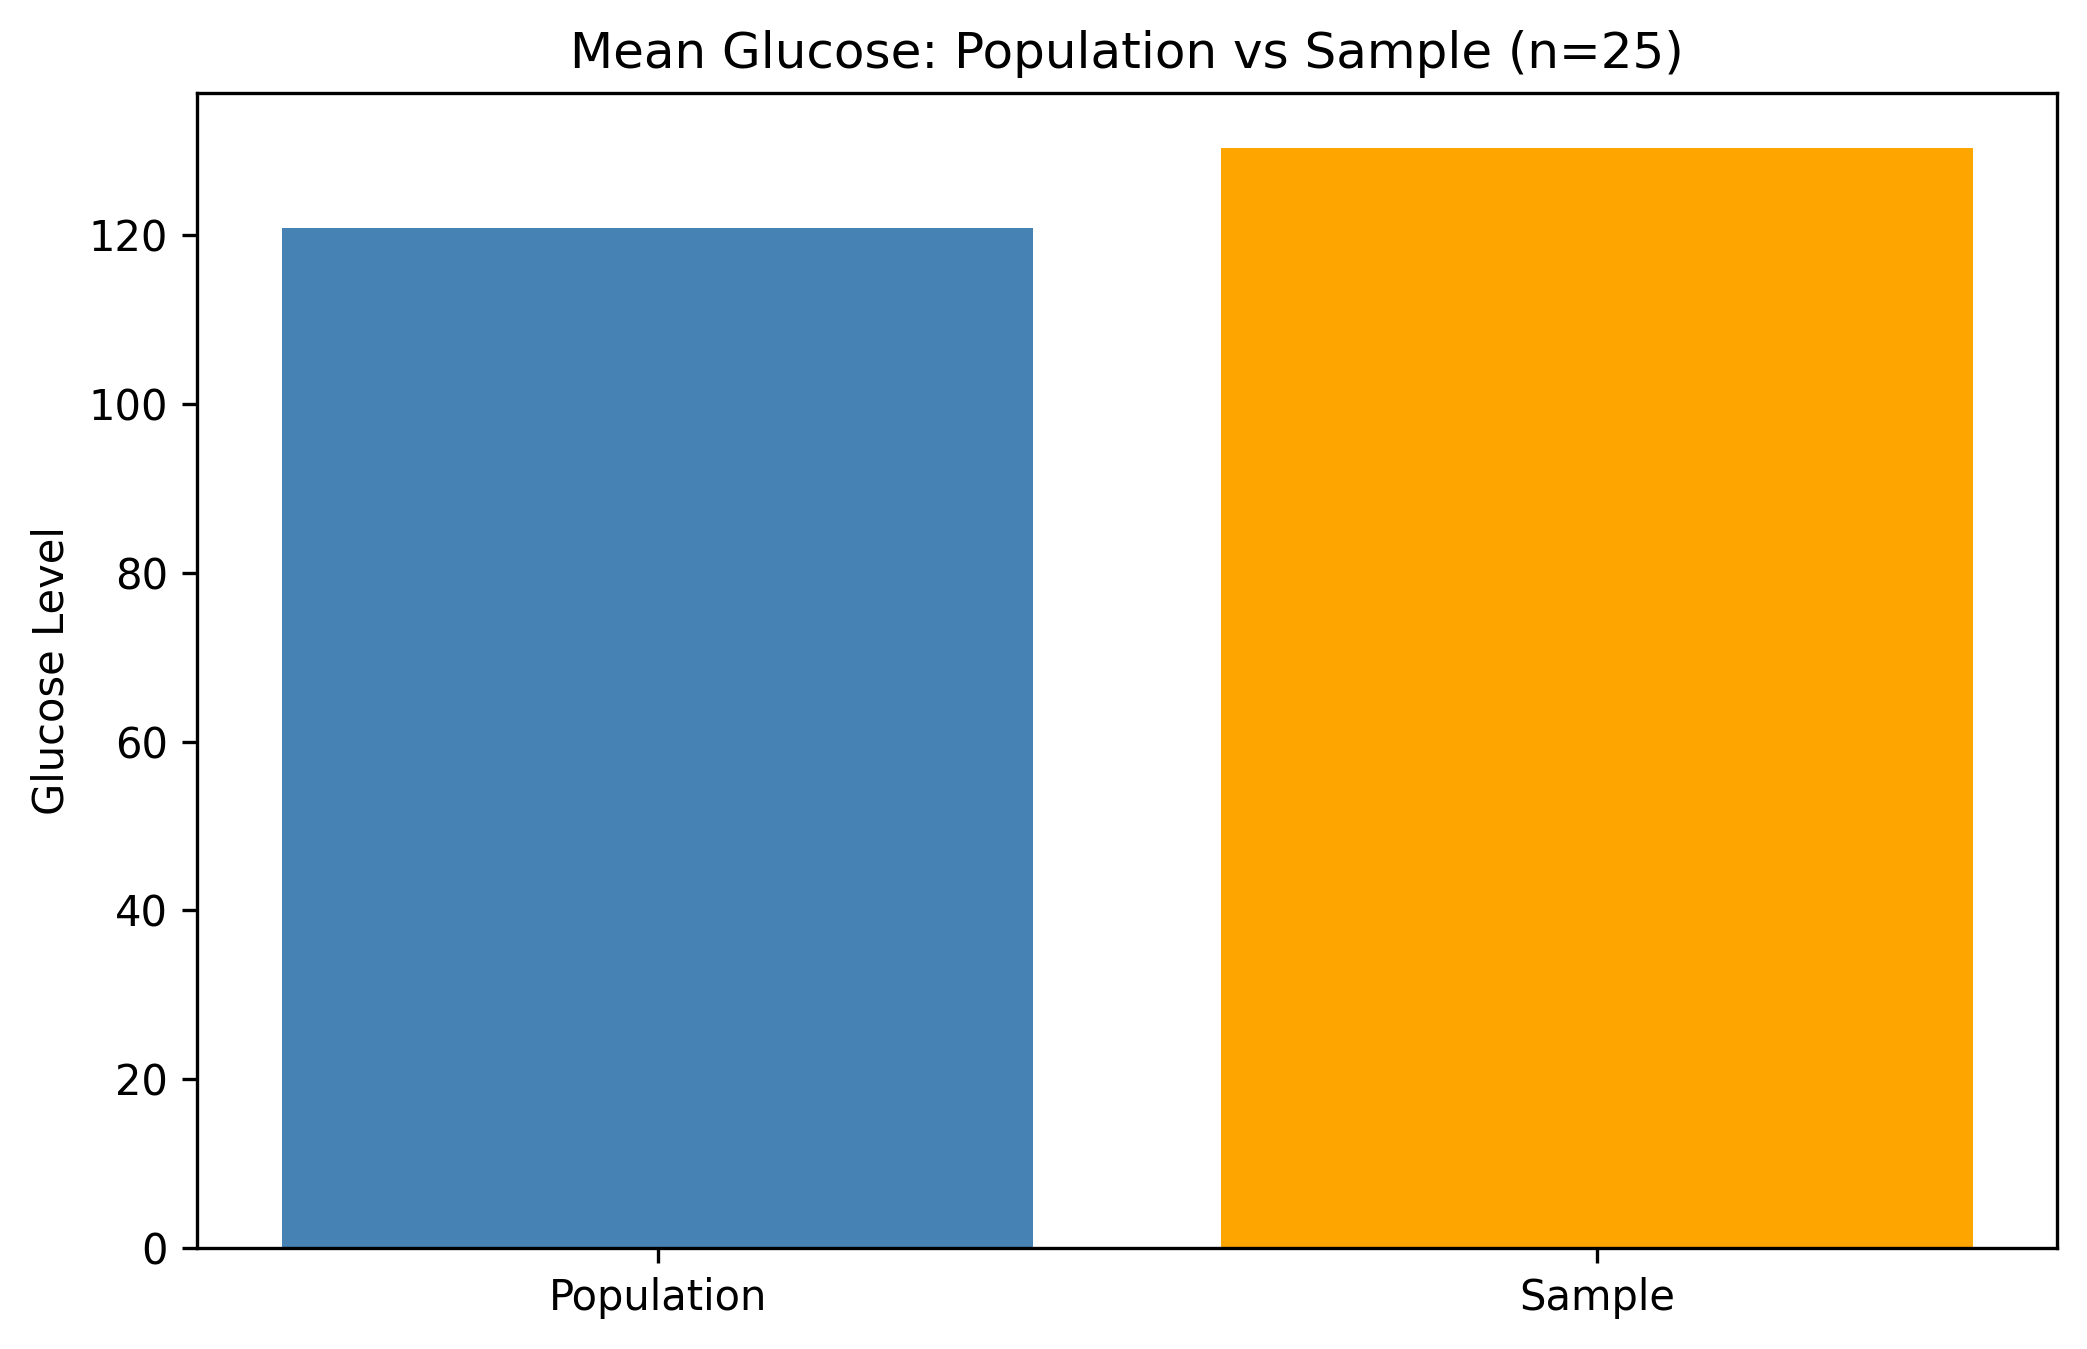

In [14]:
plt.figure(figsize=(8,5), dpi=300)
plt.bar(["Population", "Sample"],
        [pop_mean_glucose, sample_mean_glucose],
        color=["steelblue", "orange"])
plt.title("Mean Glucose: Population vs Sample (n=25)")
plt.ylabel("Glucose Level")
plt.show()


### 📊 Comparison Chart – Maximum Glucose


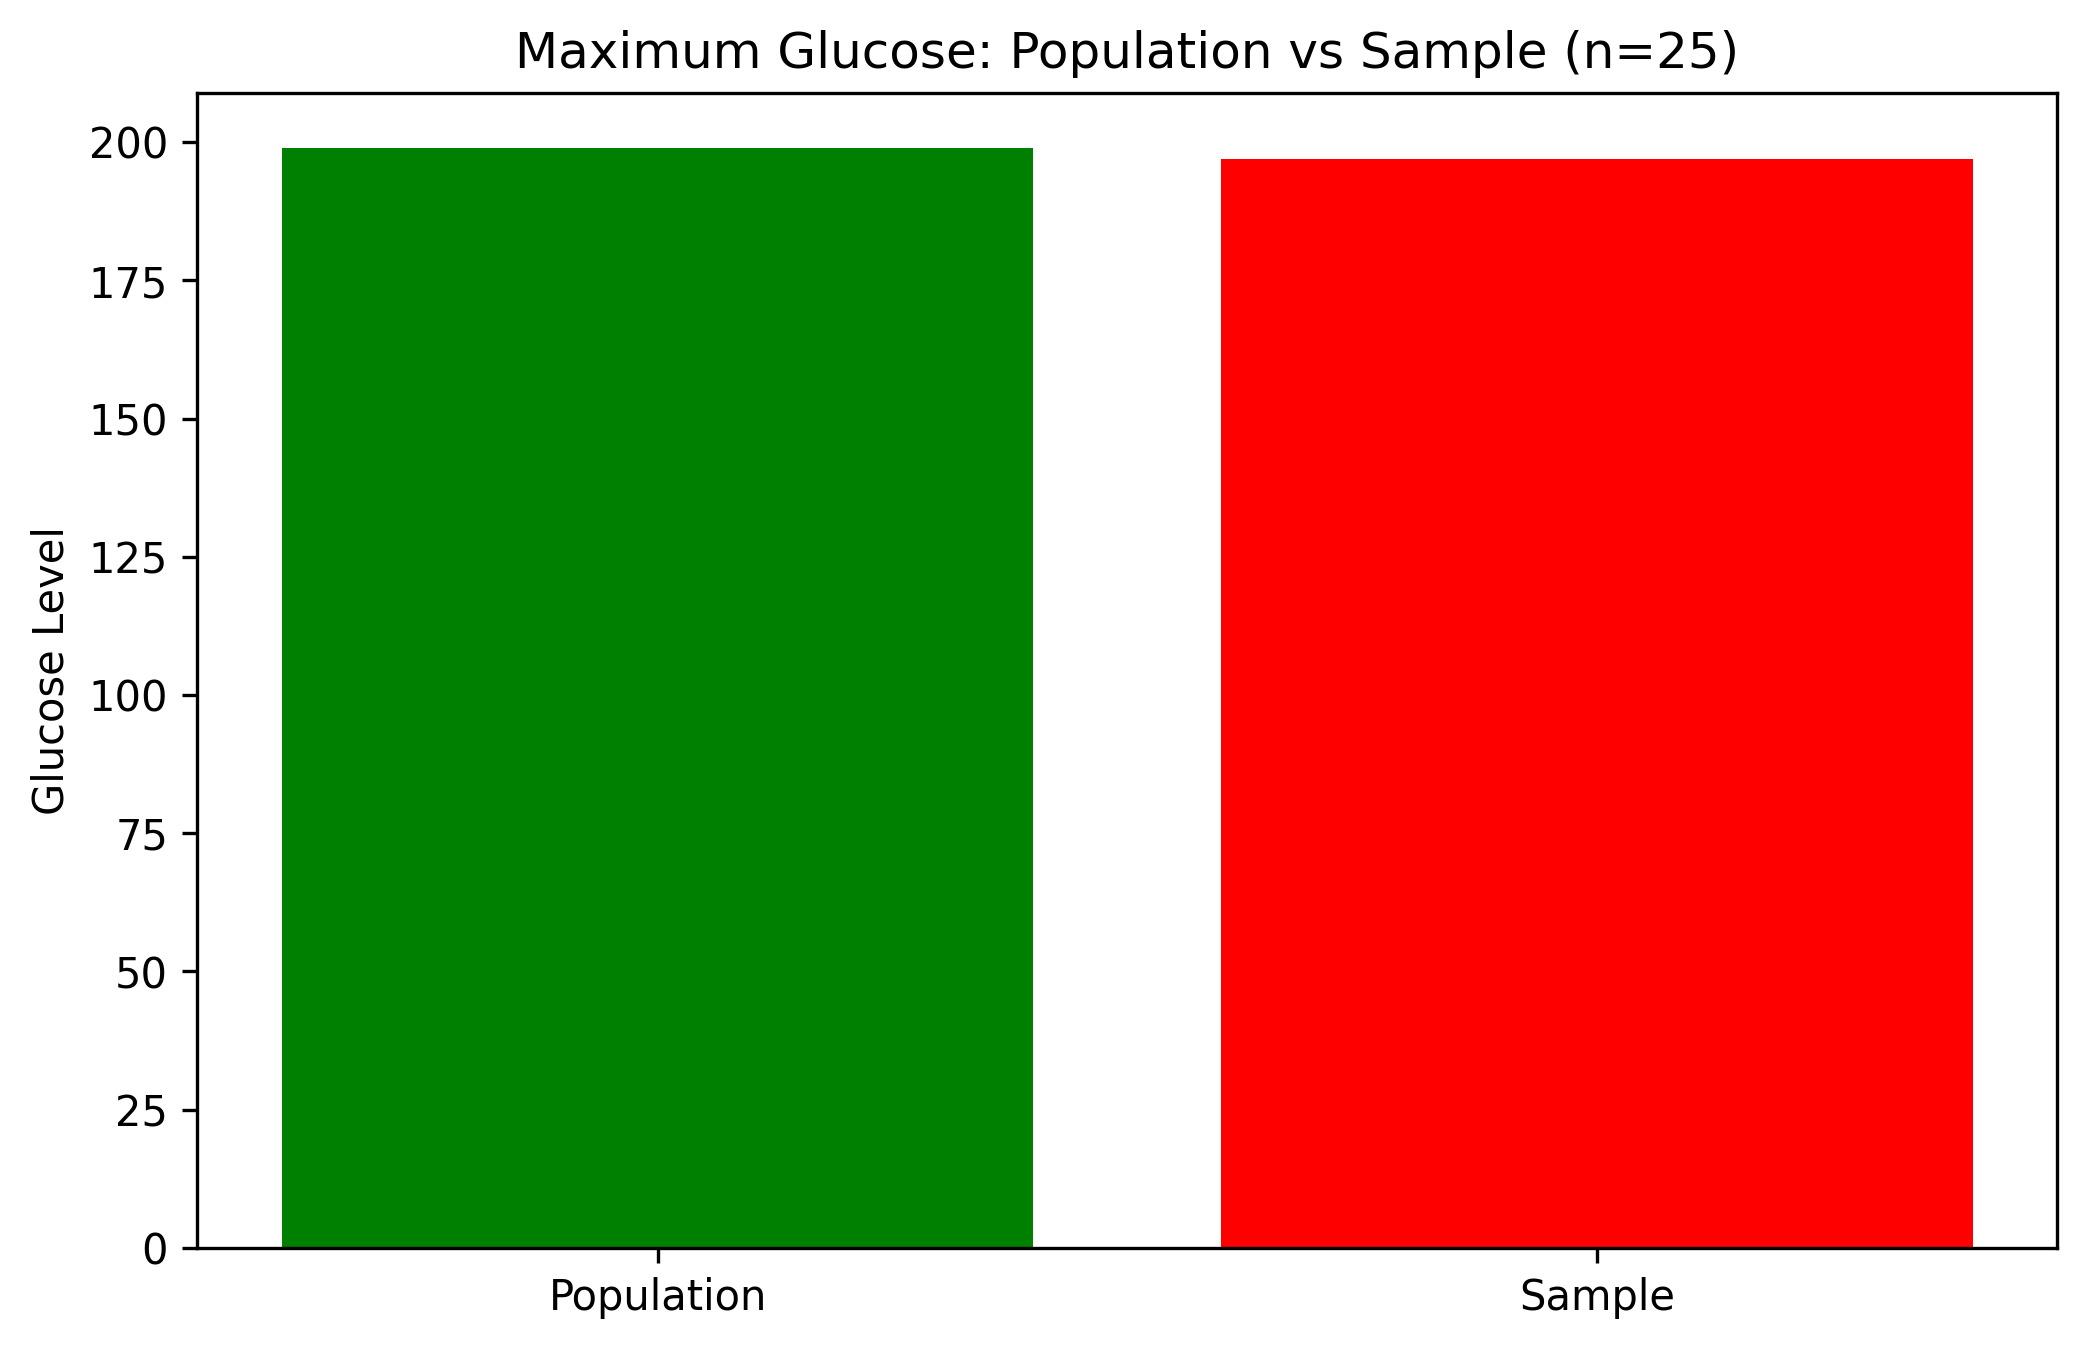

In [15]:
plt.figure(figsize=(8,5), dpi=300)
plt.bar(["Population", "Sample"],
        [pop_max_glucose, sample_max_glucose],
        color=["green","red"])
plt.title("Maximum Glucose: Population vs Sample (n=25)")
plt.ylabel("Glucose Level")
plt.show()


### ✔ Interpretation (Part a)
- Sample mean and max differ from population because **n=25 is small**.  
- Charts show sampling variability clearly.  
- Population values are more stable due to large n (768).  


# 4. Part (b): 98th Percentile of BMI  
### Goal:
- Compute 98th percentile for:
  - Sample (n=25)
  - Population
- Compare using chart.


In [16]:
sample_98_bmi = np.percentile(sample25["BMI"], 98)
pop_98_bmi = np.percentile(df["BMI"], 98)

comparison_b = pd.DataFrame({
    "Statistic": ["98th Percentile BMI"],
    "Sample (n=25)": [sample_98_bmi],
    "Population": [pop_98_bmi]
})

comparison_b



,Statistic,Sample (n=25),Population
0,98th Percentile BMI,45.264,47.526


### 📊 Comparison Chart – 98th Percentile of BMI


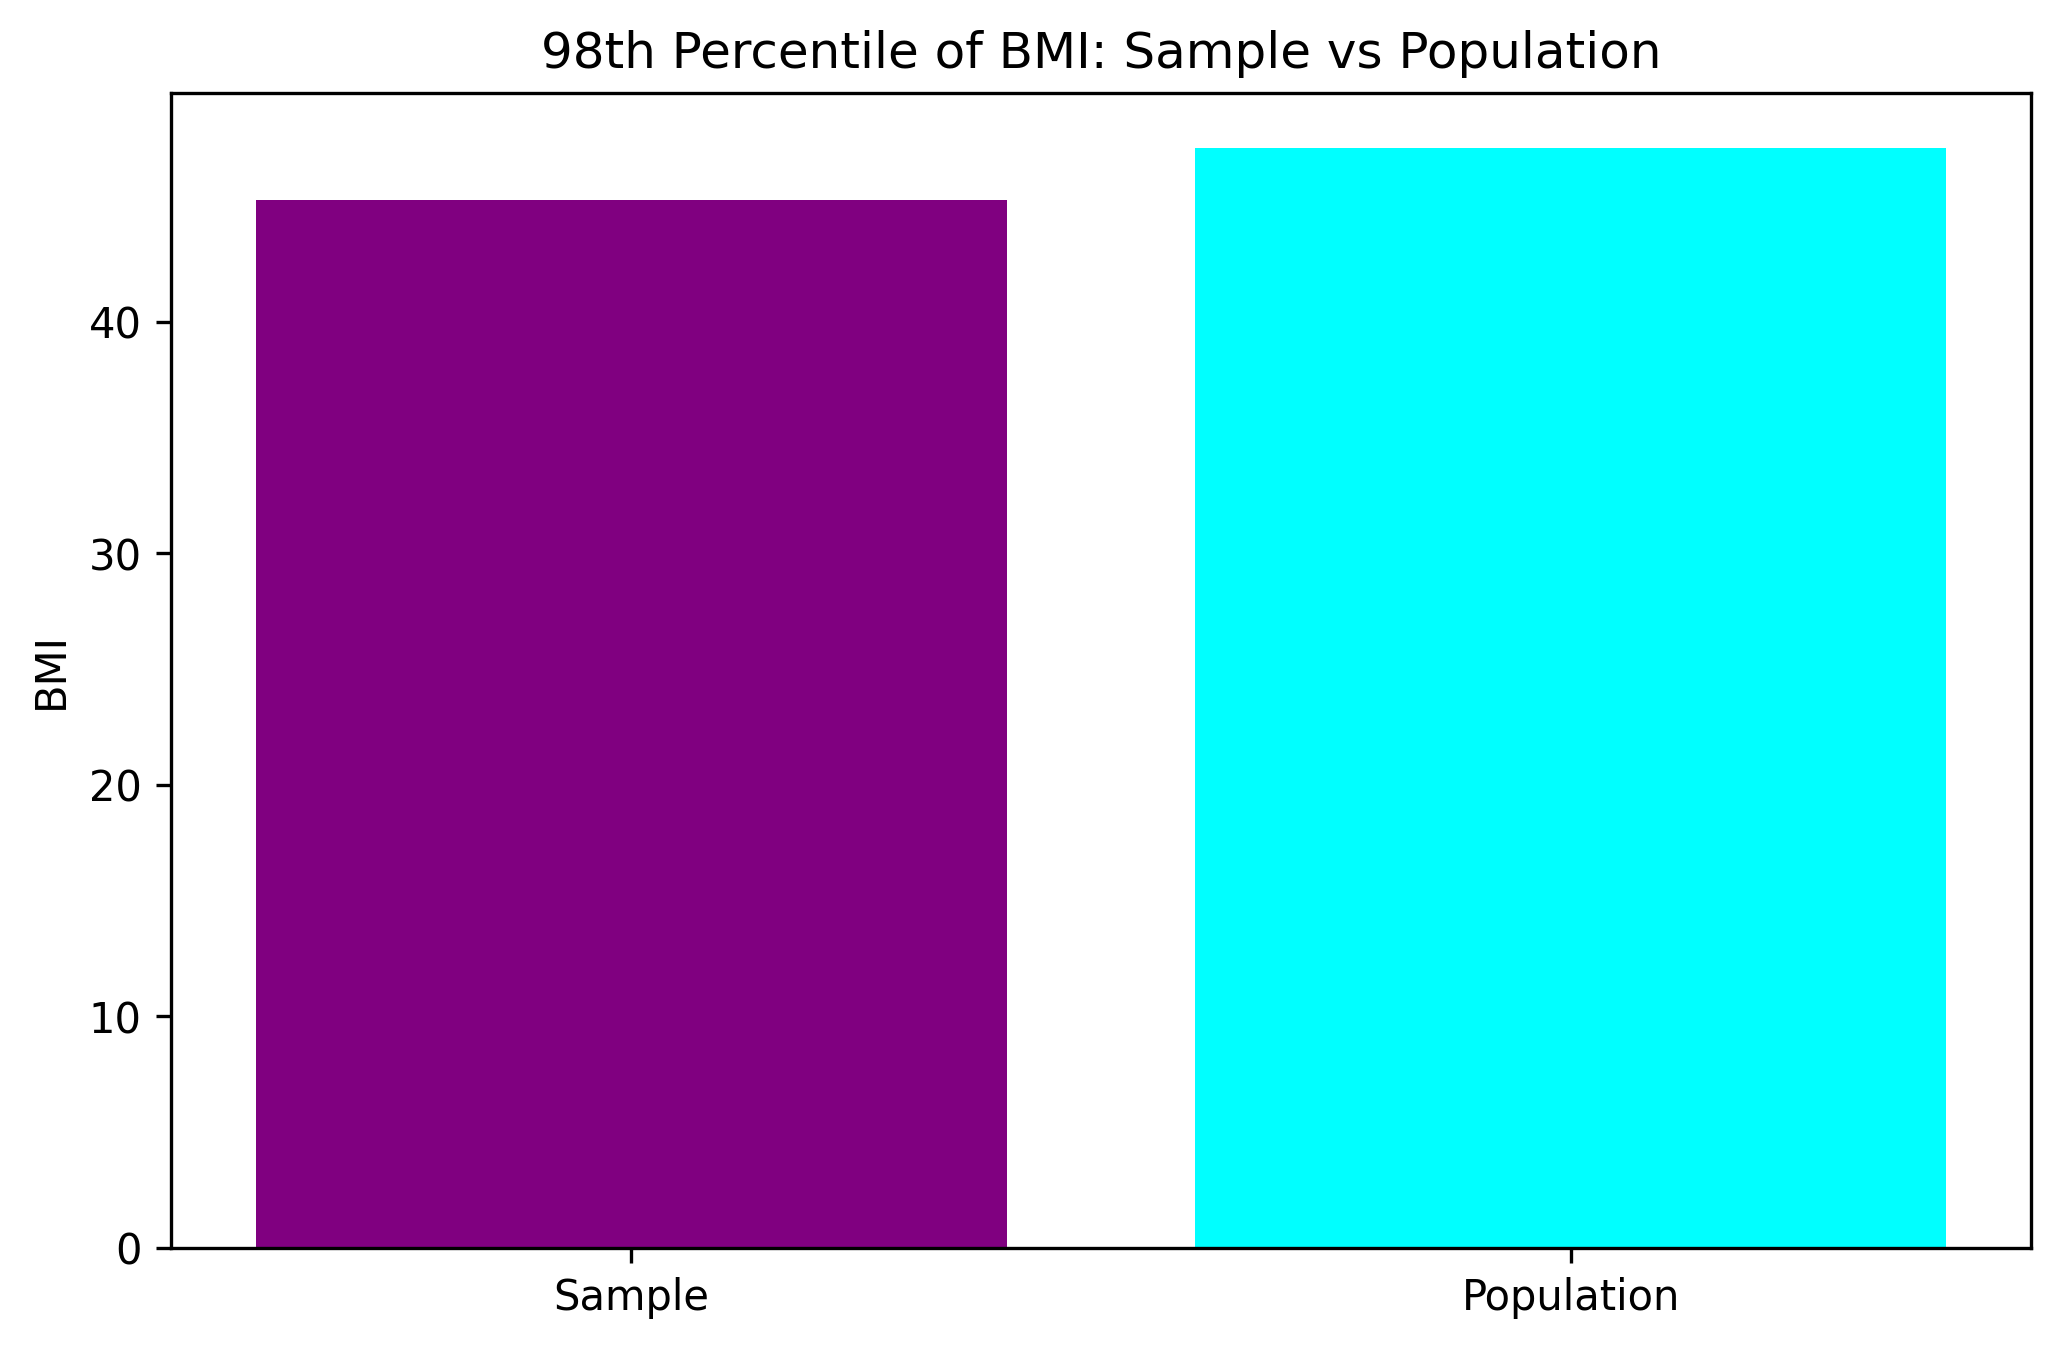

In [17]:
plt.figure(figsize=(8,5), dpi=300)
plt.bar(["Sample", "Population"],
        [sample_98_bmi, pop_98_bmi],
        color=["purple","cyan"])
plt.title("98th Percentile of BMI: Sample vs Population")
plt.ylabel("BMI")
plt.show()



###  Interpretation (Part b)
- The sample 98th percentile is unstable because **percentiles at distribution extremes require large sample sizes**.  
- Population percentile is more reliable due to 768 observations.  


# 5. Part (c): Bootstrap (500 samples × size 150)
### Goal:
- Generate 500 bootstrap samples (replace=True)
- Each sample size = 150
- For BloodPressure compute:
  - Bootstrap mean
  - Bootstrap standard deviation
  - Bootstrap 98th percentile
- Compare bootstrap averages with population
- Show distributions with histograms


In [18]:
np.random.seed(123)

B = 500
boot_means = []
boot_stds = []
boot_pcts = []

for _ in range(B):
    boot = df.sample(n=150, replace=True)
    boot_means.append(boot["BloodPressure"].mean())
    boot_stds.append(boot["BloodPressure"].std())
    boot_pcts.append(np.percentile(boot["BloodPressure"], 98))

boot_mean = np.mean(boot_means)
boot_std = np.mean(boot_stds)
boot_pct = np.mean(boot_pcts)

boot_mean, boot_std, boot_pct


(np.float64(69.15222666666666),
 np.float64(19.192792750902836),
 np.float64(98.03292000000003))

### 📊 Bootstrap Distribution – BloodPressure Mean


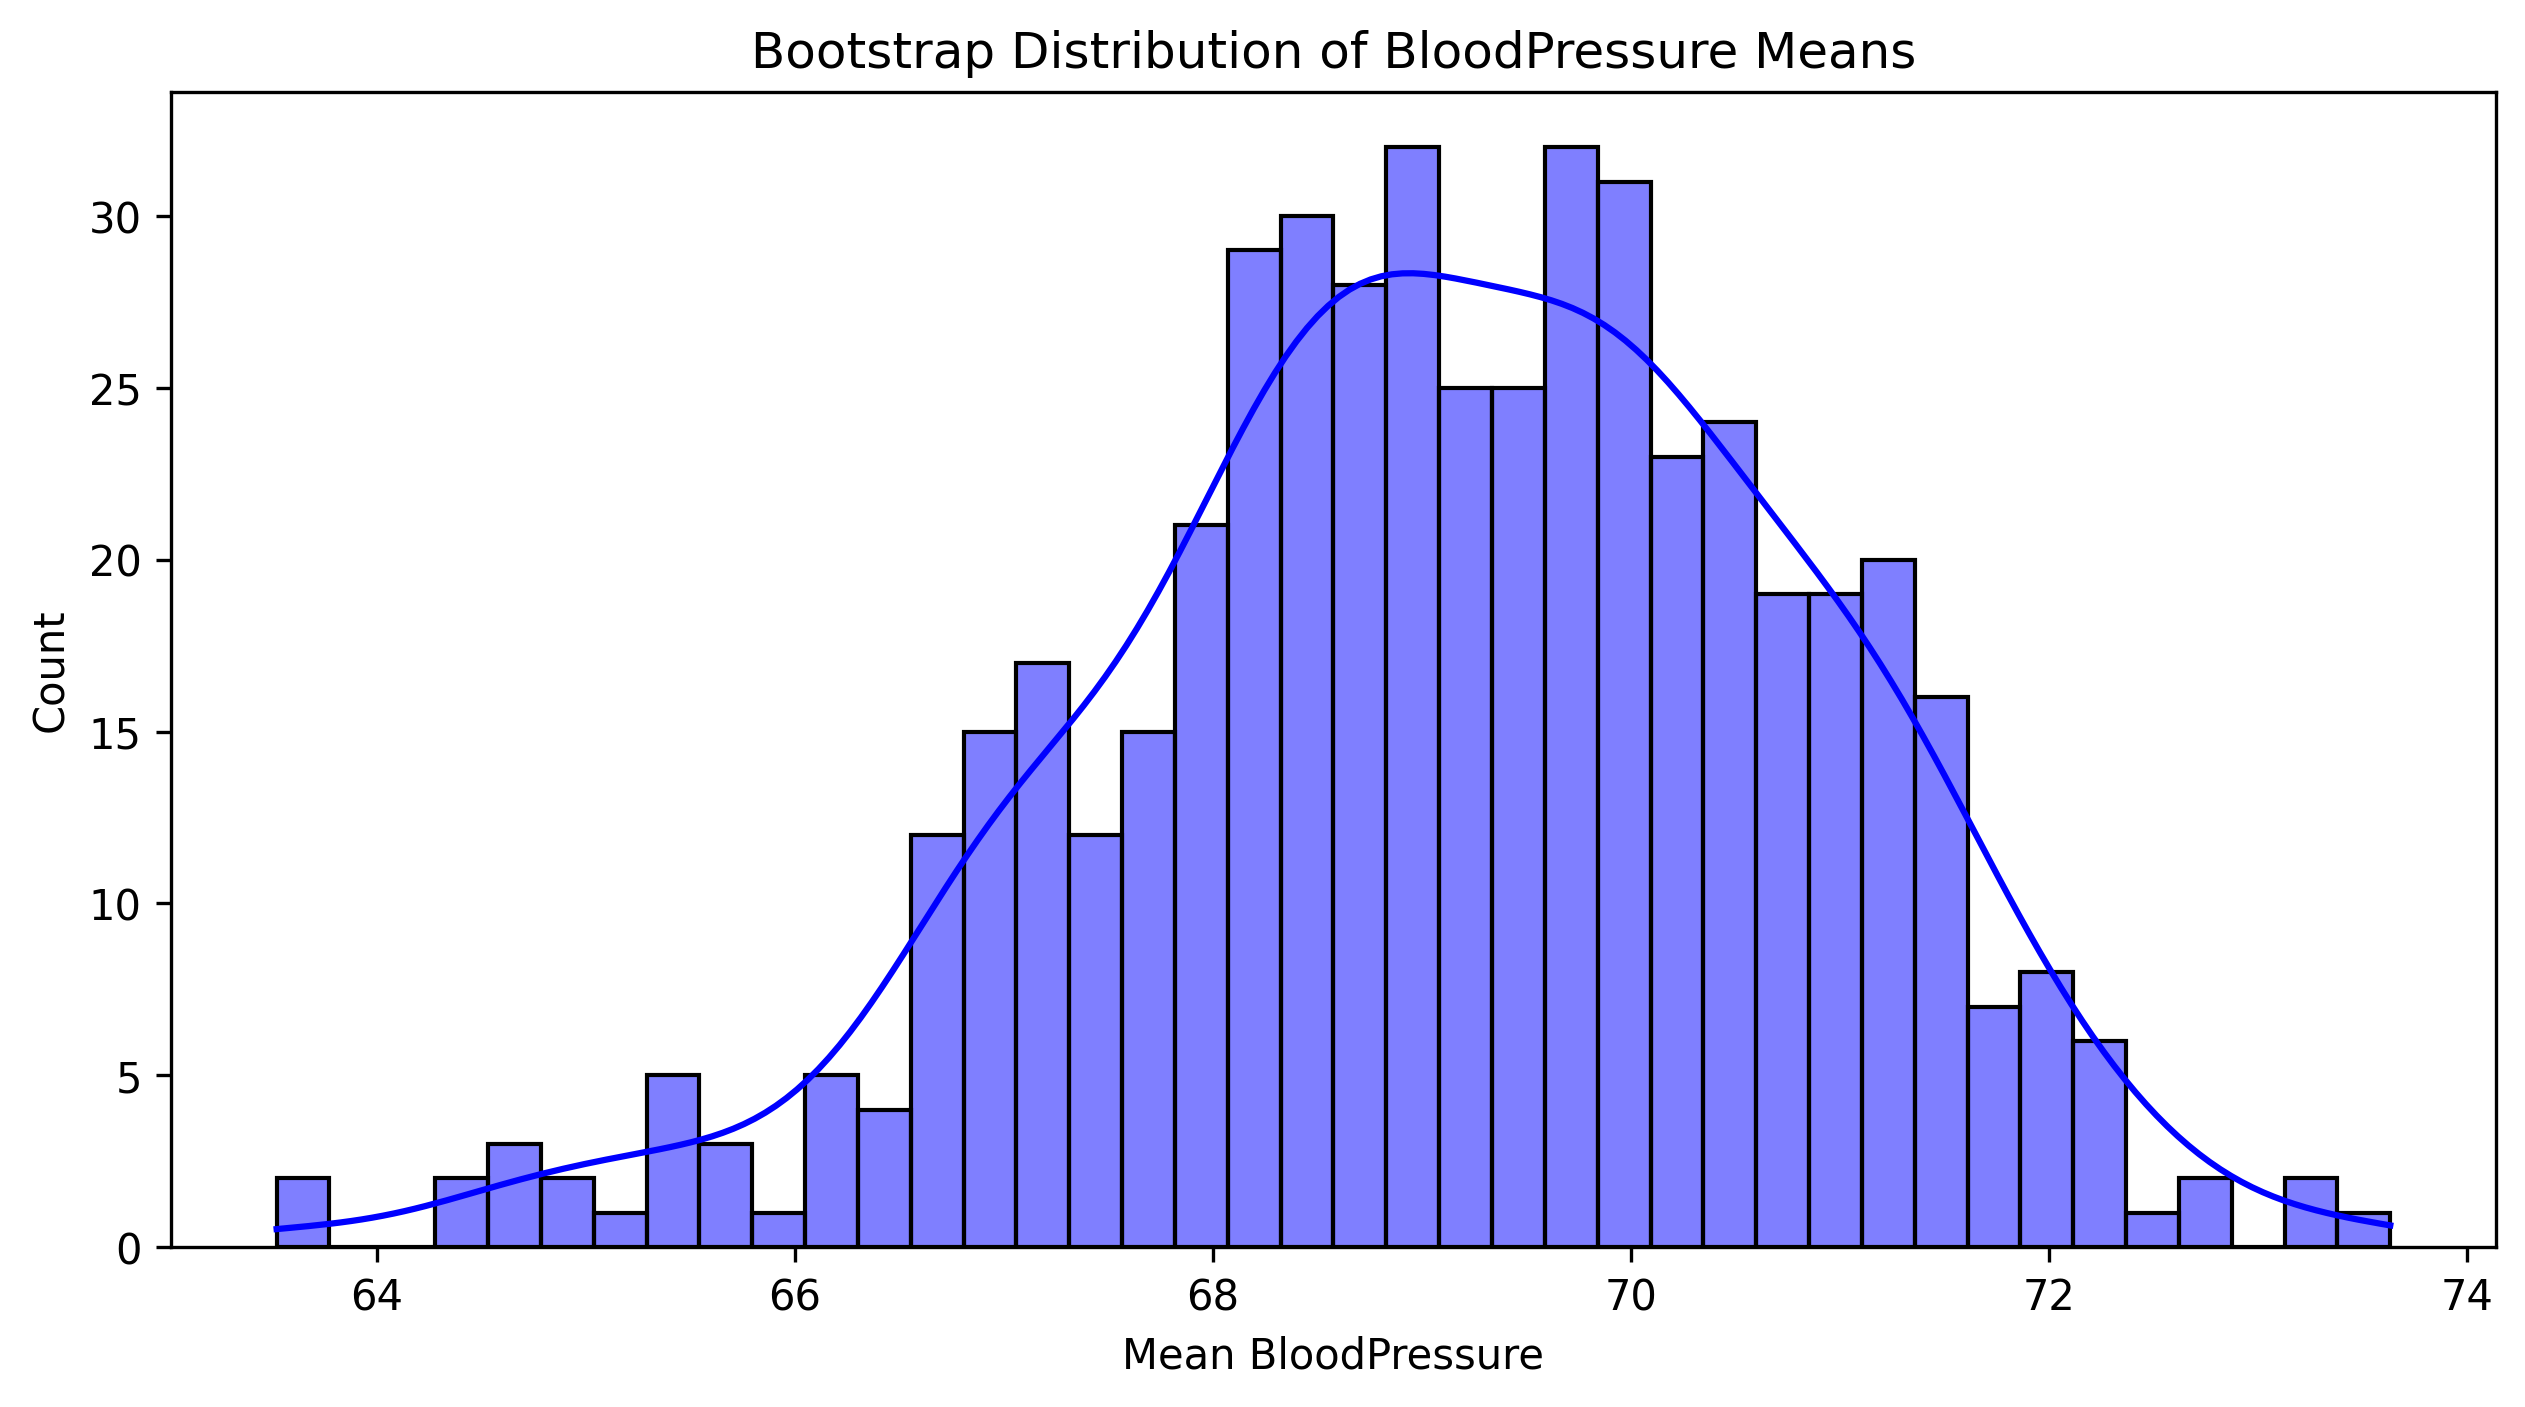

In [19]:
plt.figure(figsize=(10,5), dpi=300)
sns.histplot(boot_means, bins=40, kde=True, color='blue')
plt.title("Bootstrap Distribution of BloodPressure Means")
plt.xlabel("Mean BloodPressure")
plt.show()



### 📊 Bootstrap Distribution: Standard Deviation


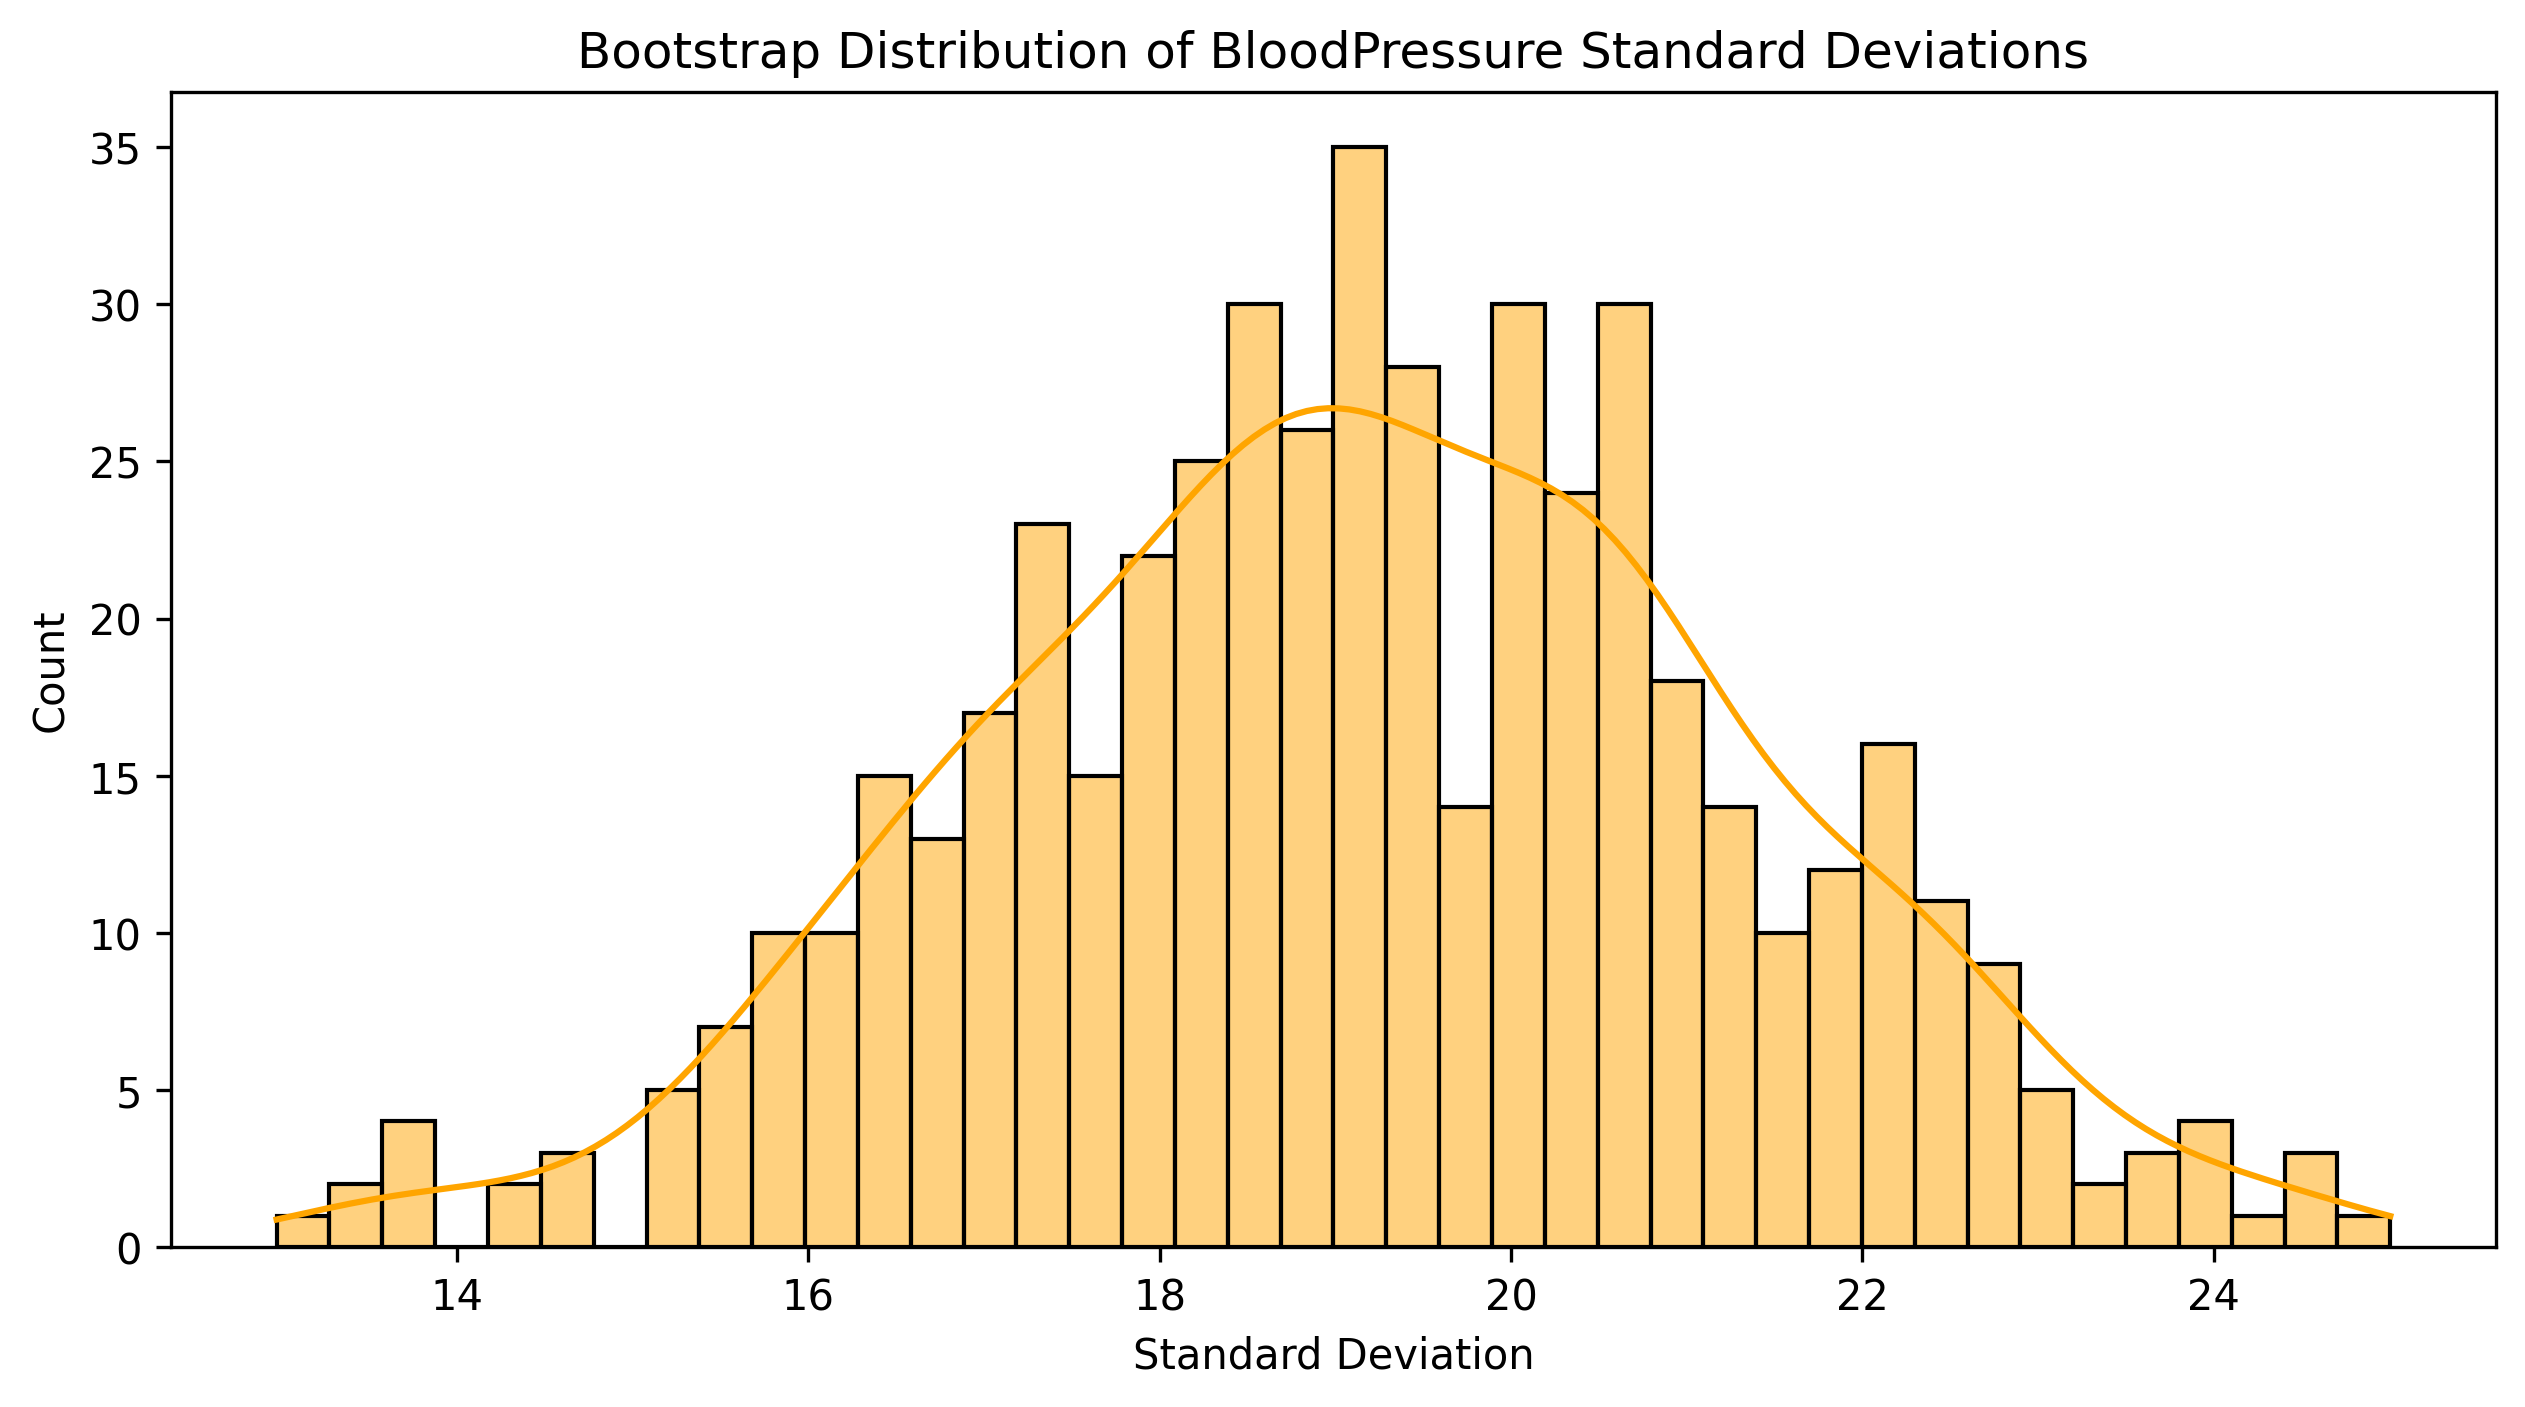

In [20]:
plt.figure(figsize=(10,5), dpi=300)
sns.histplot(boot_stds, bins=40, kde=True, color='orange')
plt.title("Bootstrap Distribution of BloodPressure Standard Deviations")
plt.xlabel("Standard Deviation")
plt.show()


### 📊 Bootstrap Distribution – 98th Percentile


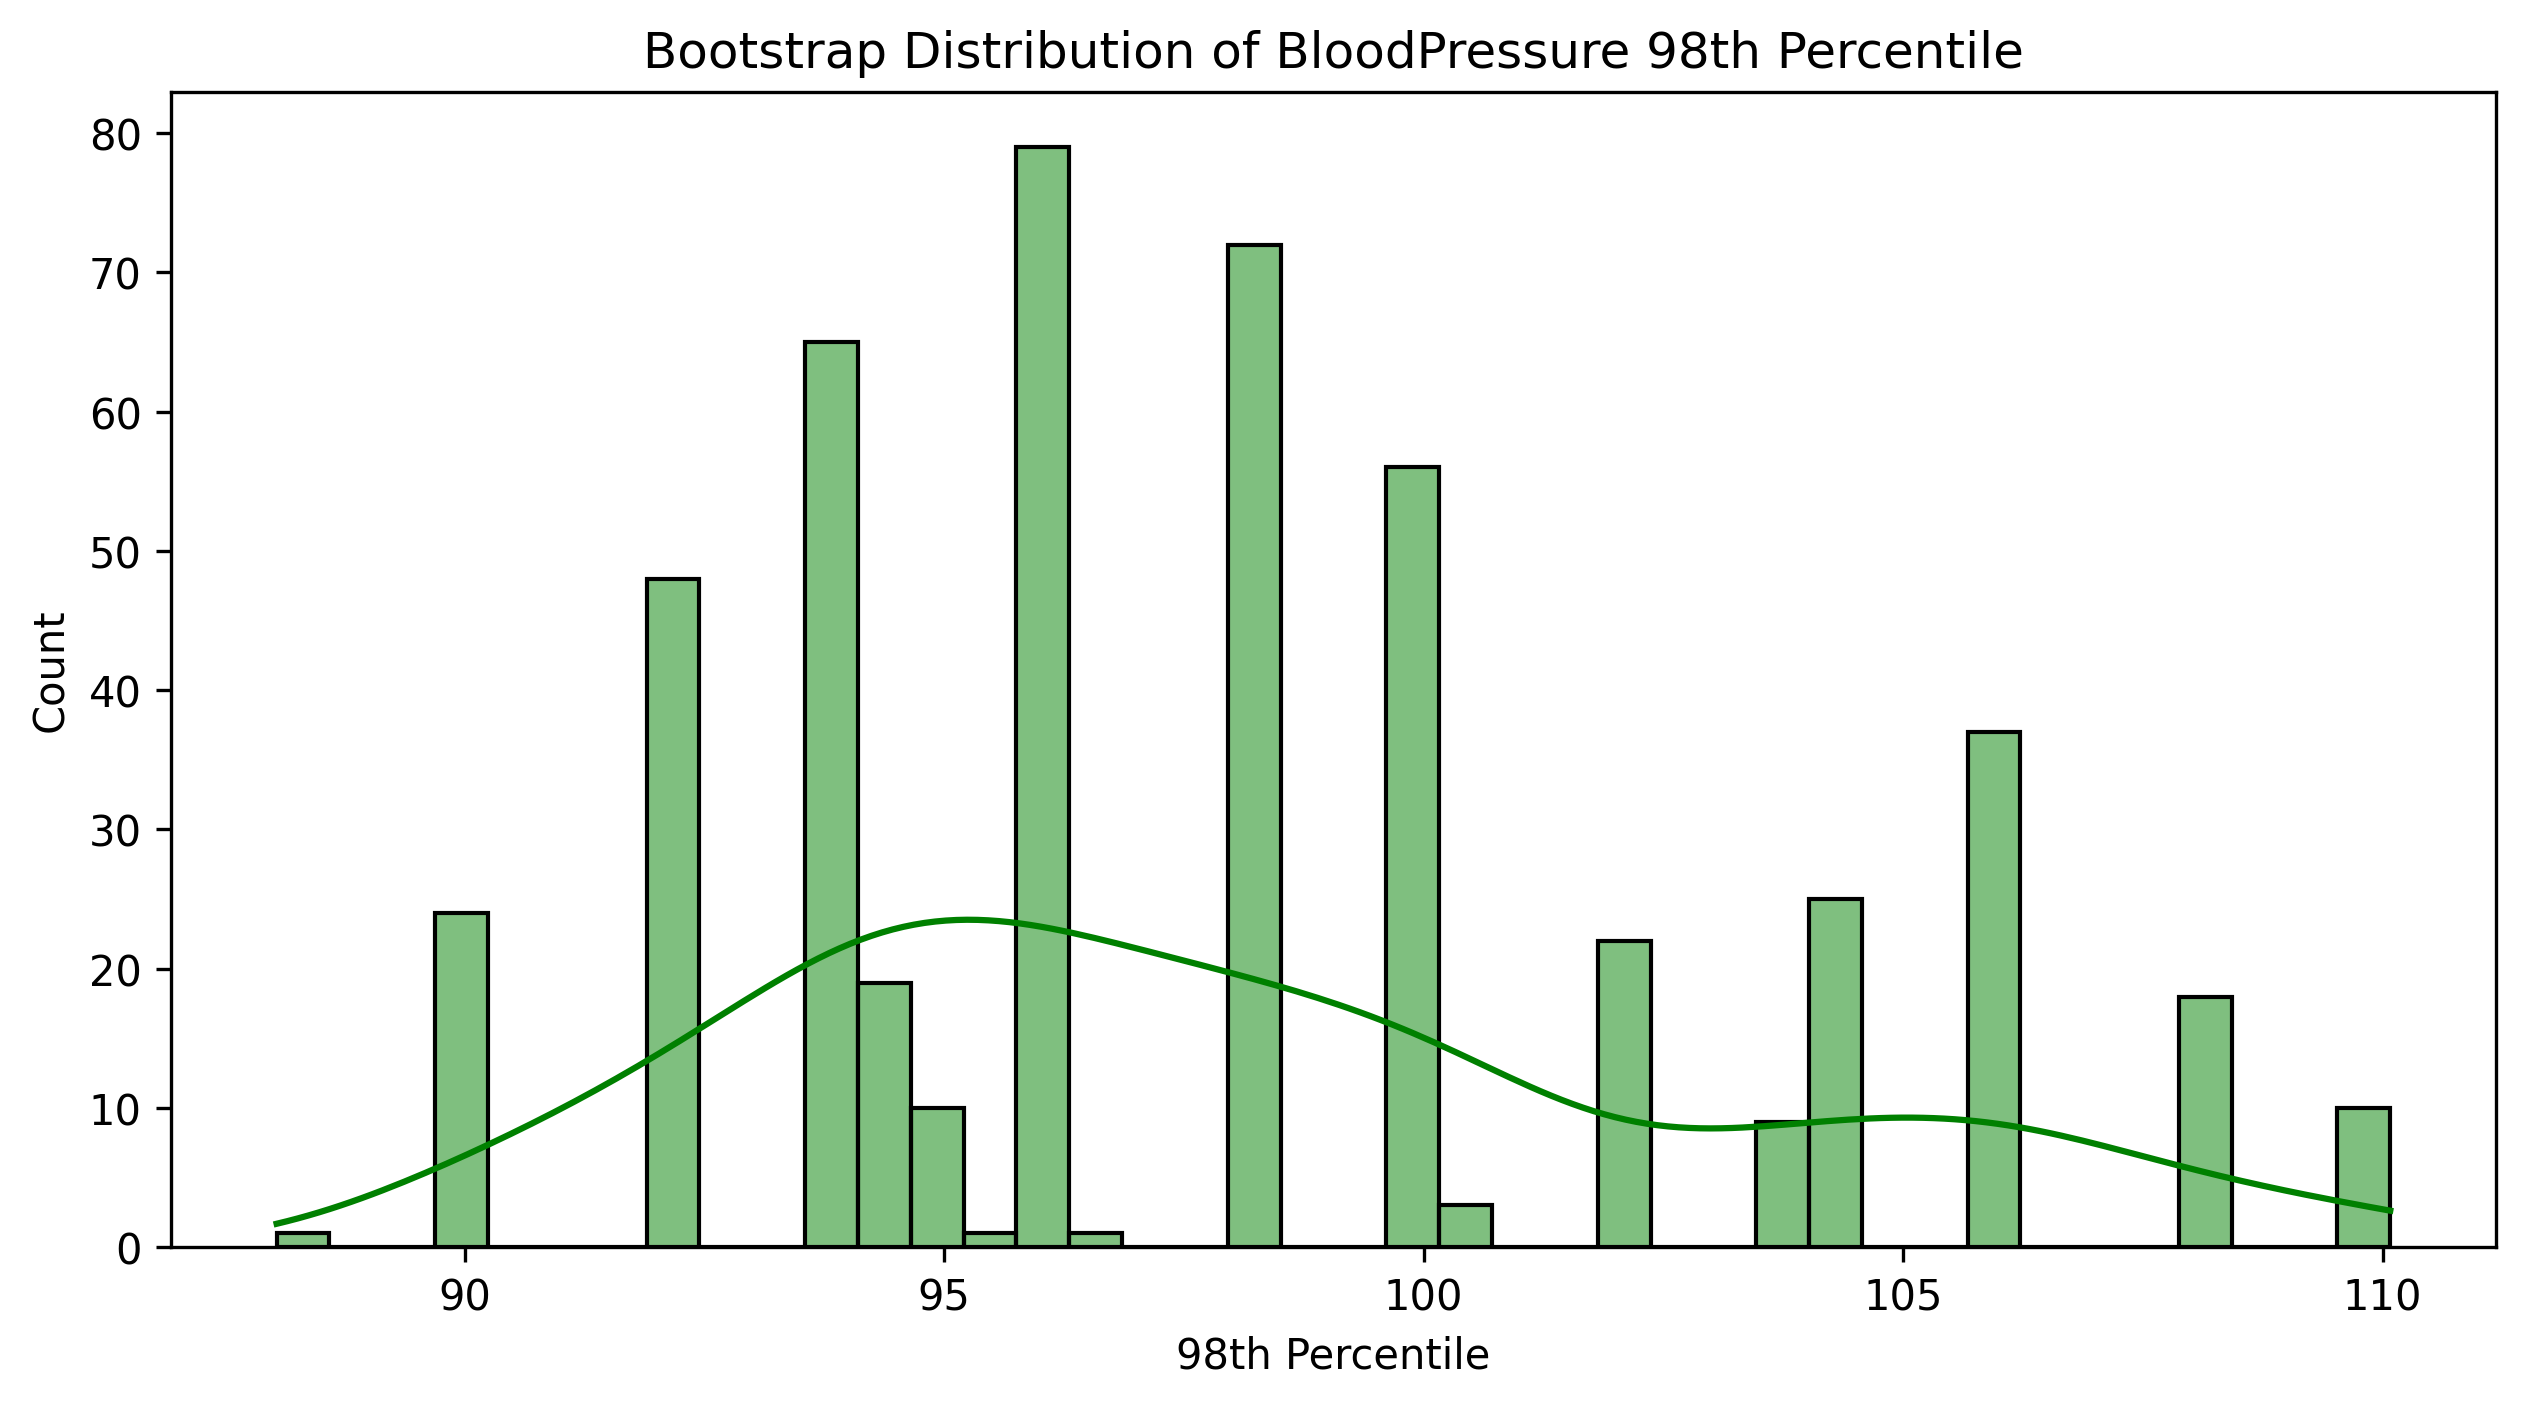

In [21]:
plt.figure(figsize=(10,5), dpi=300)
sns.histplot(boot_pcts, bins=40, kde=True, color='green')
plt.title("Bootstrap Distribution of BloodPressure 98th Percentile")
plt.xlabel("98th Percentile")
plt.show()



## 6. Comparison Table — Bootstrap vs Population


In [22]:
pop_mean_bp = df["BloodPressure"].mean()
pop_std_bp = df["BloodPressure"].std()
pop_pct_bp = np.percentile(df["BloodPressure"], 98)

comparison_c = pd.DataFrame({
    "Statistic": ["Mean", "Std Dev", "98th Percentile"],
    "Bootstrap Avg": [boot_mean, boot_std, boot_pct],
    "Population": [pop_mean_bp, pop_std_bp, pop_pct_bp]
})

comparison_c


,Statistic,Bootstrap Avg,Population
0,Mean,69.152227,69.105469
1,Std Dev,19.192793,19.355807
2,98th Percentile,98.032920,99.320000


## Interpretation (Part c)
- Bootstrap distributions are smooth and centered near the population values.  
- Bootstrap mean, SD, and percentile all closely match population statistics.  
- This demonstrates that bootstrap is a **reliable estimator** for large-sample inference.  





# 7. Final Conclusion  
- Sample statistics vary from population due to small sample size.  
- Percentiles at extremes (98th) are unstable with n=25.  
- Bootstrap provides stable estimates and mirrors the population closely.  
- All charts and tables confirm expected sampling behavior.  

This concludes Question 2 with full statistical workflow and interpretation.
